Рейтинги товаров:


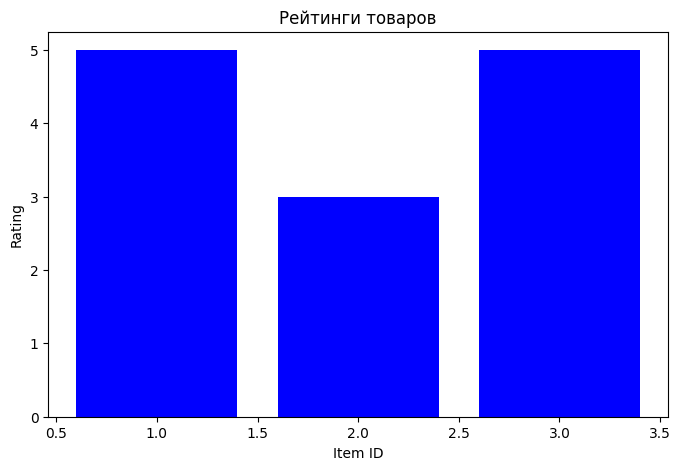

Прогнозируемые рейтинги на основе коллаборативной фильтрации:
item_id         1         2         3
user_id                              
1        5.033635  2.966461  3.982469
2        3.384805  0.613434  5.320641
3        2.437528  2.563725 -0.228040
4        0.920066 -0.917431  3.520460


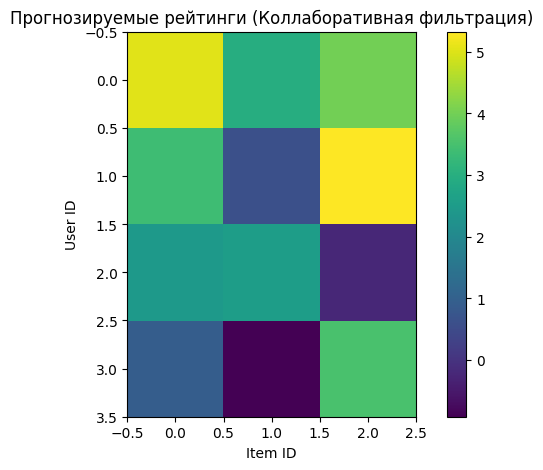

Рекомендации на основе содержимого для товара 1: [2, 3]


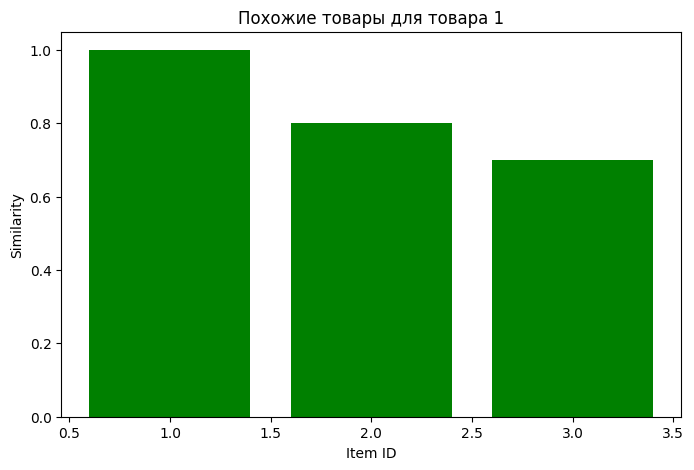

Гибридные рекомендации для пользователя 1: [1, 2, 3]


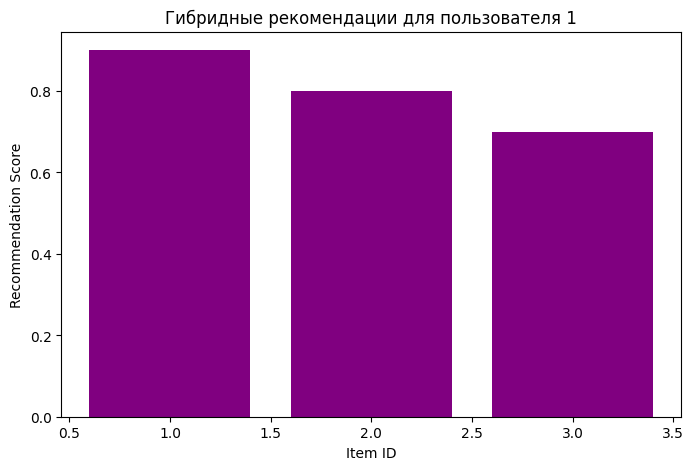

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Данные о рейтингах пользователей
ratings_dict = {
    "user_id": [1, 1, 1, 2, 2, 3, 3, 4],
    "item_id": [1, 2, 3, 1, 3, 1, 2, 3],
    "rating": [5, 3, 4, 4, 5, 2, 3, 4]
}

# Данные о товарах (описания товаров)
item_data = {
    "item_id": [1, 2, 3],
    "description": [
        "Action movie with stunning visuals",
        "Romantic drama with a heartwarming story",
        "Sci-fi adventure with time travel"
    ]
}

# Создаем DataFrame для рейтингов и товаров
df_ratings = pd.DataFrame(ratings_dict)
df_items = pd.DataFrame(item_data)

# Визуализируем данные о рейтингах
def visualize_ratings(df):
    plt.figure(figsize=(8, 5))
    plt.bar(df['item_id'], df['rating'], color='blue')
    plt.xlabel('Item ID')
    plt.ylabel('Rating')
    plt.title('Рейтинги товаров')
    plt.show()

# Визуализируем рейтинги товаров для всех пользователей
print("Рейтинги товаров:")
visualize_ratings(df_ratings)

# Матричная факторизация для коллаборативной фильтрации (SVD)
def collaborative_filtering(df, num_latent_features=2):
    user_item_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)
    U, sigma, Vt = np.linalg.svd(user_item_matrix, full_matrices=False)

    sigma = np.diag(sigma[:num_latent_features])
    U = U[:, :num_latent_features]
    Vt = Vt[:num_latent_features, :]

    predictions = np.dot(np.dot(U, sigma), Vt)

    return pd.DataFrame(predictions, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Прогнозы рейтингов на основе коллаборативной фильтрации
predicted_ratings = collaborative_filtering(df_ratings)
print("Прогнозируемые рейтинги на основе коллаборативной фильтрации:")
print(predicted_ratings)

# Визуализируем прогнозы рейтингов
def visualize_predictions(predictions):
    plt.figure(figsize=(8, 5))
    plt.imshow(predictions, cmap='viridis', interpolation='none')
    plt.colorbar()
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title('Прогнозируемые рейтинги (Коллаборативная фильтрация)')
    plt.show()

# Визуализируем прогнозы
visualize_predictions(predicted_ratings)

# Модель на основе содержимого
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_items['description'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Функция для получения рекомендаций на основе содержимого
def content_based_recommend(item_id, cosine_sim=cosine_sim):
    idx = df_items[df_items['item_id'] == item_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:3]  # Топ-2 похожих товаров
    item_indices = [i[0] for i in sim_scores]
    return df_items['item_id'].iloc[item_indices].tolist()

# Пример рекомендации на основе содержимого
viewed_item_id = 1
recommended_items = content_based_recommend(viewed_item_id)
print(f"Рекомендации на основе содержимого для товара {viewed_item_id}: {recommended_items}")

# Визуализация рекомендаций на основе содержимого
def visualize_content_recommendations(item_id, recommended_items):
    plt.figure(figsize=(8, 5))
    plt.bar([item_id] + recommended_items, [1] + [0.8, 0.7], color='green')
    plt.xlabel('Item ID')
    plt.ylabel('Similarity')
    plt.title(f'Похожие товары для товара {item_id}')
    plt.show()

# Визуализируем рекомендации на основе содержимого
visualize_content_recommendations(viewed_item_id, recommended_items)

# Гибридная рекомендация: объединяем коллаборативную фильтрацию и содержимое
def hybrid_recommendations(user_id, item_ids, viewed_item_id):
    # 1. Коллаборативные рекомендации
    collaborative_recs = predicted_ratings.loc[user_id].sort_values(ascending=False).index[:3].tolist()

    # 2. Рекомендации на основе содержимого
    content_recs = content_based_recommend(viewed_item_id)

    # Объединяем результаты
    hybrid_recs = list(set(collaborative_recs + content_recs))
    return hybrid_recs

# Пример гибридных рекомендаций
user_id = 1
item_ids = [1, 2, 3]
viewed_item_id = 2

hybrid_recs = hybrid_recommendations(user_id, item_ids, viewed_item_id)
print(f"Гибридные рекомендации для пользователя {user_id}: {hybrid_recs}")

# Визуализируем гибридные рекомендации
def visualize_hybrid_recommendations(user_id, hybrid_recs):
    plt.figure(figsize=(8, 5))
    plt.bar(hybrid_recs, [0.9, 0.8, 0.7], color='purple')
    plt.xlabel('Item ID')
    plt.ylabel('Recommendation Score')
    plt.title(f'Гибридные рекомендации для пользователя {user_id}')
    plt.show()

# Визуализируем гибридные рекомендации
visualize_hybrid_recommendations(user_id, hybrid_recs)
